<a href="https://colab.research.google.com/github/catavasia/ML_FIAN-21/blob/main/seminar07_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


dataset = fetch_california_housing()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

print(len(data))
data.head(10)

20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

This data contains 2 spacial features: `['Longitude', 'Latitude']`:

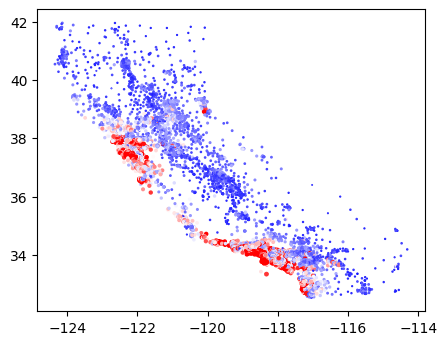

In [4]:
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr');

(Compare this plot with the map of California: https://en.wikipedia.org/wiki/California)

A kNN model might be quite reasonable to use on this 2D subspace.

Let's first divide our data into train and test:

In [5]:
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


# Task 1

 - Build a kNN regressor on the `Longitude` and `Latitude` features
 - Build a random forest regressor on the rest of the features
 - Build a stacking regressor (`sklearn.ensemble.StackingRegressor`) with 5-fold cross-val-predict using the two models above as the base models and a linear regression model as the final (aggregating) estimator
 - Compare the test MSE losses of the 3 models above
 

Make sure to have a look at the documentation: 
https://scikit-learn.org/stable/modules/ensemble.html#stacking

You can make a pipeline (`sklearn.pipeline.make_pipeline`) with a `ColumnTransformer` (`sklearn.compose.make_column_transformer`) and a regression model (knn or random forest), where the `ColumnTransformer` will select the desired columns from the dataset (see the docs for the column transformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html).

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.compose import make_column_selector

In [110]:
MSE = []

# kNN regressor

In [111]:
X_train_kNN = X_train[['Latitude', 'Longitude']]
X_test_kNN = X_test[['Latitude', 'Longitude']]
kNN = KNeighborsRegressor()
kNN.fit(X_train_kNN, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

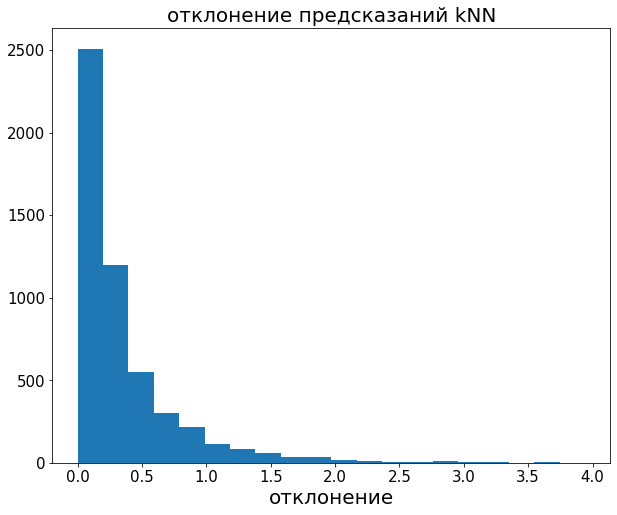

In [112]:
y_pred_kNN = kNN.predict(X_test_kNN)

MSE.append(mean_squared_error(y_test, y_pred_kNN))

plot_hist(y_test, y_pred_kNN, 'kNN')

# Random Forest

In [113]:
X.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [114]:
features_RF = X.keys()[:-2]

In [115]:
X_train_RF = X_train[features_RF]
X_test_RF = X_test[features_RF]

In [117]:
RF = RandomForestRegressor(min_samples_leaf=5)
RF.fit(X_train_RF, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

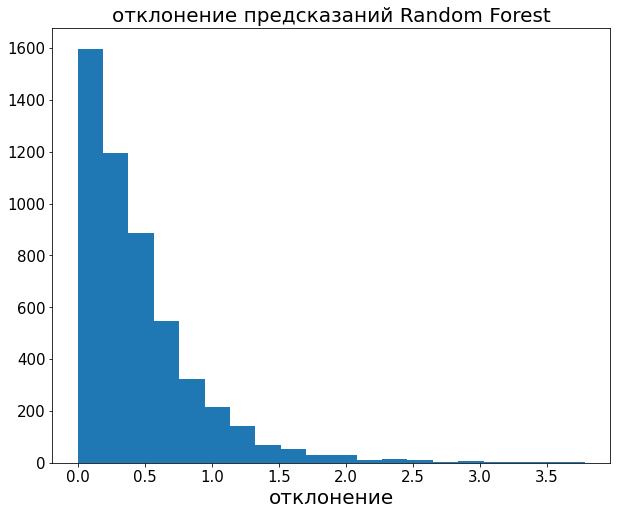

In [118]:
y_pred_RF = RF.predict(X_test_RF)

plot_hist(y_test, y_pred_RF, 'Random Forest')

MSE.append(mean_squared_error(y_test, y_pred_RF))

# Stacking Regressor

In [119]:
knn_pipeline = make_pipeline(make_column_transformer(
                                                    ("passthrough", ['Latitude', 'Longitude'])
                              ),
                             KNeighborsRegressor()
)

In [120]:
knn_pipeline

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('passthrough', 'passthrough',
                                                  ['Latitude', 'Longitude'])],
                                   verbose=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [121]:
list(features_RF)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [122]:
rf_pipeline = make_pipeline(make_column_transformer(
                                                    ("passthrough",list(features_RF))
                                                    ),
                             RandomForestRegressor()
)

In [123]:
rf_pipeline

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('passthrough', 'passthrough',
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup'])],
                                   verbose=False)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
       

In [124]:
estimators = [
    ("Random Forest", rf_pipeline),
    ("kNN", knn_pipeline)
]
final_estimator = LinearRegression()

In [126]:
reg = StackingRegressor(
                        estimators=estimators,
                        final_estimator=final_estimator
                        )
reg.estimators

[('Random Forest', Pipeline(memory=None,
           steps=[('columntransformer',
                   ColumnTransformer(n_jobs=None, remainder='drop',
                                     sparse_threshold=0.3,
                                     transformer_weights=None,
                                     transformers=[('passthrough', 'passthrough',
                                                    ['MedInc', 'HouseAge',
                                                     'AveRooms', 'AveBedrms',
                                                     'Population', 'AveOccup'])],
                                     verbose=False)),
                  ('randomforestregressor',
                   RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto', max_leaf_nodes=None,
                                         max_samples=None,
                          

In [127]:
reg.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('Random Forest',
                               Pipeline(memory=None,
                                        steps=[('columntransformer',
                                                ColumnTransformer(n_jobs=None,
                                                                  remainder='drop',
                                                                  sparse_threshold=0.3,
                                                                  transformer_weights=None,
                                                                  transformers=[('passthrough',
                                                                                 'passthrough',
                                                                                 ['MedInc',
                                                                                  'HouseAge',
                                                                                  

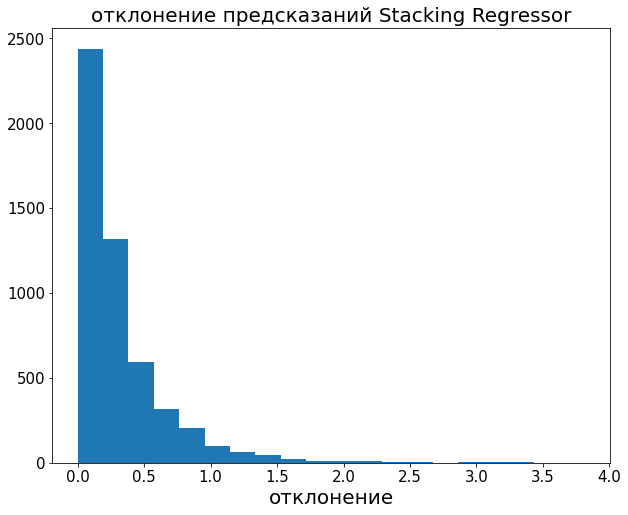

In [130]:
y_pred_reg = reg.predict(X_test)

plot_hist(y_test, y_pred_reg, 'Stacking Regressor')

MSE.append(mean_squared_error(y_test, y_pred_reg))

# Comparison

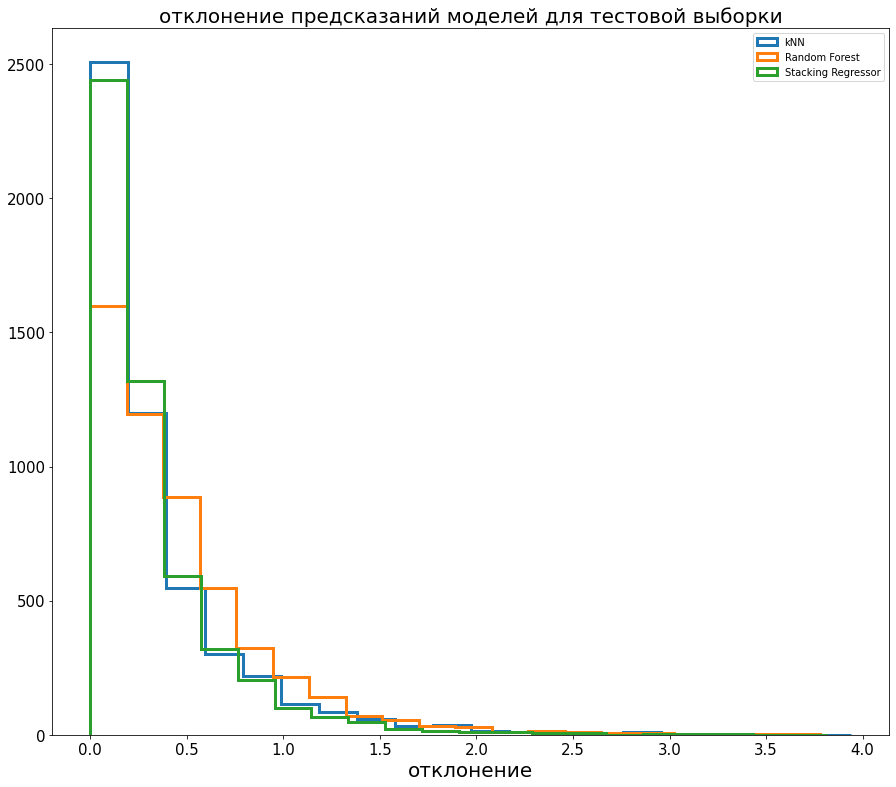

In [141]:
plt.figure(figsize=(15,13))
plt.tick_params(labelsize=15)
plt.hist(np.abs(y_test - y_pred_kNN), bins=20, label='kNN', histtype='step', linewidth=3)
plt.hist(np.abs(y_test - y_pred_RF), histtype='step', bins=20, label='Random Forest', linewidth=3)
plt.hist(np.abs(y_test - y_pred_reg),histtype='step', bins=20, label='Stacking Regressor', linewidth=3)
plt.xlabel('отклонение', fontsize=20)
plt.title('отклонение предсказаний моделей для тестовой выборки', fontsize=20)
plt.legend()

In [136]:
models = ['kNN', 'Random Forest', 'Stacking Regressor']

for i in range(len(models)):
  print('model:', models[i], ', ', 'MSE =', MSE[i], '\n')

model: kNN ,  MSE = 0.30089594142376896 

model: Random Forest ,  MSE = 0.4215938892438269 

model: Stacking Regressor ,  MSE = 0.23493177874583884 

